<a href="https://colab.research.google.com/github/inakizardain/Clustering_Whrs_State_MEX/blob/main/Clustering_the_labor_force_in_Mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mexico's 2022 ENOE (National Survey of Occupation and Employment or "*Encuesta Nacional de Ocupación y Empleo*"). Analysis of the 4th semester.

Mexico is a nation whith different industries accross its states and something well known around the world is that mexicans work hard, thus my objective is to know if I can group the workforce in Mexico by states and hours worked.

In order to fullfill my objective I will cluster using KMeans and ENOE's SDEM dataset which has sociodemographic variables captured while interviewing a sample of the mexican population.

# Data pre-processing

In [150]:
# Randomizing
import random

# Arrays and matrices
import numpy as np

# DataFrames
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import datasets to Google Colab
import io
from google.colab import files

## Importing data

The original dataset from ENOE SDEM has 396,629 rows, which lakes a while to be loaded. In order to access it quickly each time I open again this project, I built a new CSV file that contains 3,000 rows from the original dataset and I will show you the process in the following code. The name of the new CSV file is sample_enoe.xlsx.



```
file = files.upload()
enoe2022 = pd.read_csv(io.BytesIO(file['conjunto_de_datos_sdem_enoen_2022_4t.csv']), encoding='latin-1')

np.random.seed(150)
random_rows = np.random.choice(enoe2022.index, 3000)
enoe2022 = enoe2022.loc[random_rows] # Getting the selected rows
print(len(enoe2022))

enoe2022.to_csv('sample_enoe.csv', index=False, encoding = 'utf-8')
```





In [151]:
file = files.upload()

Saving sample_enoe.csv to sample_enoe (1).csv


In [152]:
enoe2022 = pd.read_csv('sample_enoe.csv', encoding='utf-8')
enoe2022.head()

,r_def,loc,mun,est,est_d_tri,est_d_men,ageb,t_loc_tri,t_loc_men,cd_a,...,scian,t_tra,emp_ppal,tue_ppal,trans_ppal,mh_fil2,mh_col,sec_ins,tipo,mes_cal
0,0,,28,40,349,309,0,1,1,7,...,19,1,2,2,0,2,2,9,1,11
1,0,,3,30,49,,0,1,,42,...,16,1,2,2,0,3,2,7,1,99
2,0,,5,20,136,116,0,1,1,26,...,0,1,0,0,0,0,0,0,1,12
3,0,,12,20,330,292,0,3,3,84,...,0,1,0,0,0,0,0,0,1,12
4,0,,2,20,27,24,0,2,2,83,...,0,0,0,0,0,0,0,0,1,10


## Cleaning Data

In [153]:
enoe2022.columns

Index(['r_def', 'loc', 'mun', 'est', 'est_d_tri', 'est_d_men', 'ageb',
       't_loc_tri', 't_loc_men', 'cd_a',
       ...
       'scian', 't_tra', 'emp_ppal', 'tue_ppal', 'trans_ppal', 'mh_fil2',
       'mh_col', 'sec_ins', 'tipo', 'mes_cal'],
      dtype='object', length=114)

### 1- Choosing columns that "may be good for the analysis"

In [154]:
columns = enoe2022.columns.isin(['r_def', 'mun', 'est', 'ent', 'n_ent', 'c_res', 'par_c', 'sex', 'eda', 'cs_p12', 'cs_p14_c', 'cs_p17', 'n_hij', 'e_con', 'ur', 'zona', 'salario',  'clase1', 'sub_o', 'dispo', 'no_dispo', 'niv_ins', 'eda5c', 'anios_esc', 'hrsocup', 'ingocup', 'ing_x_hrs', 'imssissste', 'ma48me1sm', 'p14apoyos', 'scian', 't_tra', 'emp_ppal', 'tipo'])
enoe2022 = enoe2022.loc[:, columns]
enoe2022.shape

(3000, 33)

In [155]:
enoe2022.head()

,r_def,mun,est,ent,n_ent,c_res,par_c,sex,eda,cs_p12,...,hrsocup,ingocup,ing_x_hrs,imssissste,ma48me1sm,p14apoyos,scian,t_tra,emp_ppal,tipo
0,0,28,40,24,3,1,601,2,35,1,...,25,2150,20.00000,3,0,0,19,1,2,1
1,0,3,30,4,1,1,101,2,49,1,...,30,18000,139.53488,2,0,0,16,1,2,1
2,0,5,20,10,3,1,201,2,74,1,...,0,0,0.00000,0,0,0,0,1,0,1
3,0,12,20,22,1,1,201,2,45,1,...,0,0,0.00000,0,0,0,0,1,0,1
4,0,2,20,2,5,2,,,,,...,0,0,0.00000,0,0,0,0,0,0,1


### 2- Data Types

In [156]:
#There are many missing values that aren't captured usin info method, thus I will replace blank spaces with NaN.
enoe2022.replace(' ', np.nan, inplace=True)

In [157]:
enoe2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   r_def       3000 non-null   int64  
 1   mun         2970 non-null   object 
 2   est         3000 non-null   int64  
 3   ent         3000 non-null   int64  
 4   n_ent       3000 non-null   int64  
 5   c_res       3000 non-null   int64  
 6   par_c       2940 non-null   object 
 7   sex         2940 non-null   object 
 8   eda         2940 non-null   object 
 9   cs_p12      2765 non-null   object 
 10  cs_p14_c    598 non-null    object 
 11  cs_p17      2765 non-null   object 
 12  n_hij       1289 non-null   object 
 13  e_con       2440 non-null   object 
 14  ur          3000 non-null   int64  
 15  zona        3000 non-null   int64  
 16  salario     3000 non-null   int64  
 17  clase1      3000 non-null   int64  
 18  sub_o       3000 non-null   int64  
 19  dispo       3000 non-null  

In [158]:
# I will change all columns to float first, because later on I have to review how I deal with missing values and I may change datatypes again.
for column in enoe2022.columns:
  enoe2022[column] = enoe2022[column].astype(float)

enoe2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   r_def       3000 non-null   float64
 1   mun         2970 non-null   float64
 2   est         3000 non-null   float64
 3   ent         3000 non-null   float64
 4   n_ent       3000 non-null   float64
 5   c_res       3000 non-null   float64
 6   par_c       2940 non-null   float64
 7   sex         2940 non-null   float64
 8   eda         2940 non-null   float64
 9   cs_p12      2765 non-null   float64
 10  cs_p14_c    598 non-null    float64
 11  cs_p17      2765 non-null   float64
 12  n_hij       1289 non-null   float64
 13  e_con       2440 non-null   float64
 14  ur          3000 non-null   float64
 15  zona        3000 non-null   float64
 16  salario     3000 non-null   float64
 17  clase1      3000 non-null   float64
 18  sub_o       3000 non-null   float64
 19  dispo       3000 non-null  

### 3- Dealing with Missing Values
I will do the following according to each missing value


*   mun: Since municipalities vary a lot according to the size and division of the state I will remove the columns. It is not very important for my analysis.
*   par_c: The relationship is important for the analysis, thus I will remove the rows without this data.
*   sex: Sex is important for the analysis, thus I will remove the rows without this data.
*   eda: age is important for the analysis, thus I will remove the rows without this data.
*   cs_p12: If somebody knows hot to learn is important for the analysis and in case somebody didn't answer we will assume he/she doesn't know how the answer. Value will be replaced with 9 (according to ENOE classification).
*   cs_p14_c: If somebody has a career is important for the analysis and in case somebody didn't answer we will assume he/she doesn't have a career or degree. Value will be replaced with 0.
*    cs_p17: If somebody is attending school is important for the analysis and in case somebody didn't answer we will assume he/she aren't attending school. Value will be replaced with 2 (according to ENOE classification).
*    n_hij: If somebody has children is important for the analysis and in case somebody didn't answer we will assume he/she doesn't have children. Value will be replaced with 0 (according to ENOE classification).
*    e_con: If somebody ir married, not or any other option is important for the analysis and in case somebody didn't answer we will assume he/she are single. Value will be replaced with 6 (according to ENOE classification).




In [159]:
mv = enoe2022.isna().sum()
print(mv[mv > 0])

mun           30
par_c         60
sex           60
eda           60
cs_p12       235
cs_p14_c    2402
cs_p17       235
n_hij       1711
e_con        560
dtype: int64


In [160]:
enoe2022.drop('mun', axis = 1, inplace = True)

In [161]:
enoe2022.dropna(subset = ['par_c', 'sex', 'eda'], inplace = True)

In [162]:
enoe2022['cs_p12'].fillna(9,  inplace = True)

In [163]:
enoe2022['cs_p14_c'].fillna(0,  inplace = True)

In [164]:
enoe2022['cs_p17'].fillna(2,  inplace = True)

In [165]:
enoe2022['n_hij'].fillna(0,  inplace = True)

In [166]:
enoe2022['e_con'].fillna(6,  inplace = True)

In [167]:
# Checking if there are any missing values left. All changes were well done.
enoe2022.isna().sum()

r_def         0
est           0
ent           0
n_ent         0
c_res         0
par_c         0
sex           0
eda           0
cs_p12        0
cs_p14_c      0
cs_p17        0
n_hij         0
e_con         0
ur            0
zona          0
salario       0
clase1        0
sub_o         0
dispo         0
niv_ins       0
eda5c         0
anios_esc     0
hrsocup       0
ingocup       0
ing_x_hrs     0
imssissste    0
ma48me1sm     0
p14apoyos     0
scian         0
t_tra         0
emp_ppal      0
tipo          0
dtype: int64

### 4- Removing Duplicates
Even though the code says that there are 15 duplicated values, I took a close look and realized they were not real duplicated values because they are not exacly the same and have differences in data related to location aspects, thus I will not change de df according to this finding.

In [168]:
# Seeing how many duplicated values are, in this case there are 15.
enoe2022.duplicated().sum()

15

In [169]:
enoe2022[enoe2022.duplicated()].sort_values(by = 'est')

,r_def,est,ent,n_ent,c_res,par_c,sex,eda,cs_p12,cs_p14_c,...,hrsocup,ingocup,ing_x_hrs,imssissste,ma48me1sm,p14apoyos,scian,t_tra,emp_ppal,tipo
460,0.0,10.0,20.0,2.0,1.0,301.0,1.0,11.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
533,0.0,20.0,11.0,4.0,1.0,201.0,2.0,53.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
895,0.0,20.0,6.0,3.0,1.0,301.0,2.0,13.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1498,0.0,20.0,4.0,4.0,1.0,301.0,2.0,11.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1921,0.0,20.0,29.0,4.0,1.0,301.0,1.0,7.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012,0.0,20.0,22.0,2.0,1.0,301.0,2.0,13.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2171,0.0,20.0,5.0,3.0,1.0,301.0,2.0,7.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2389,0.0,20.0,6.0,3.0,1.0,301.0,2.0,9.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2529,0.0,20.0,16.0,4.0,1.0,301.0,1.0,9.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2908,0.0,20.0,17.0,3.0,1.0,101.0,1.0,33.0,1.0,0.0,...,45.0,7740.0,40.0,4.0,0.0,0.0,4.0,1.0,1.0,1.0


### 5- Outlier detection

In [170]:
print(enoe2022.describe())

             r_def          est          ent        n_ent        c_res  \
count  2940.000000  2940.000000  2940.000000  2940.000000  2940.000000   
mean      0.005102    23.210884    16.257143     3.008844     1.028571   
std       0.276642     8.333171     9.349761     1.407191     0.237372   
min       0.000000    10.000000     1.000000     1.000000     1.000000   
25%       0.000000    20.000000     8.000000     2.000000     1.000000   
50%       0.000000    20.000000    15.000000     3.000000     1.000000   
75%       0.000000    30.000000    25.000000     4.000000     1.000000   
max      15.000000    40.000000    32.000000     5.000000     3.000000   

             par_c          sex         eda       cs_p12       cs_p14_c  ...  \
count  2940.000000  2940.000000  2940.00000  2940.000000    2940.000000  ...   
mean    242.657483     1.521429    33.89898     1.528912   12091.698299  ...   
std     107.519184     0.499626    21.42114     1.893071   43972.676340  ...   
min     101.0

In [172]:
# Reviewing the last dataset's description and comparing it with the data dictionary from ENOE, we can see that the only variables that can have outliers to be removed are
# eda, hrsocup, ingocup, ing_x_hrs
out_list = ['eda', 'hrsocup', 'ingocup', 'ing_x_hrs']
for col in out_list:
  q3=enoe2022[col].quantile(.75)
  q1=enoe2022[col].quantile(.25)
  IQR=q3-q1
  top_range=q3+(1.5*IQR)
  low_range=q1-(1.5*IQR)
  enoe2022_wo=enoe2022.loc[(enoe2022[col]>low_range) & (enoe2022[col]<top_range)]
enoe2022_wo

,r_def,est,ent,n_ent,c_res,par_c,sex,eda,cs_p12,cs_p14_c,...,hrsocup,ingocup,ing_x_hrs,imssissste,ma48me1sm,p14apoyos,scian,t_tra,emp_ppal,tipo
0,0.0,40.0,24.0,3.0,1.0,601.0,2.0,35.0,1.0,0.0,...,25.0,2150.0,20.0,3.0,0.0,0.0,19.0,1.0,2.0,1.0
2,0.0,20.0,10.0,3.0,1.0,201.0,2.0,74.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,20.0,22.0,1.0,1.0,201.0,2.0,45.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.0,30.0,26.0,4.0,1.0,401.0,2.0,89.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.0,10.0,12.0,3.0,1.0,408.0,2.0,8.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,20.0,18.0,3.0,1.0,408.0,2.0,1.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2996,0.0,10.0,16.0,1.0,1.0,408.0,1.0,28.0,1.0,0.0,...,48.0,5160.0,25.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0
2997,0.0,10.0,7.0,2.0,1.0,201.0,2.0,25.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2998,0.0,20.0,15.0,4.0,1.0,101.0,2.0,69.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


##### Note: In case you are wondering why I followed the previous process while only using two rows for the analysis, the reason is that I want to show my Data Pre-Processing skills.

## Analysis
* I will proceed to cluster, with and without transforming with Standard Scaler and then use KMeans.
* For this analysis I will only use the columns of 'ingocup' and 'ent'.

I didn't use PCA in any of the following analysis because I ran PCA in all features and the result says that there were either 0 or 1 feature with high variance. The analysis of each feature variance is how PCA recommends to reduce the dimension.



```
enoe2022_np_full = enoe2022_wo.to_numpy()

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(enoe2022_np_full)
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()
```




### 1- Only KMeans

#### 1.a) Choosing Elbow Point

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

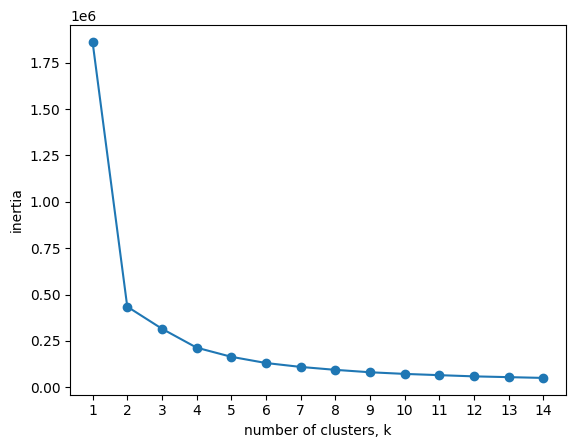

In [173]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from  sklearn.cluster import KMeans

enoe2022_np = enoe2022_wo[['hrsocup', 'ent']].to_numpy()

ks = range(1, 15)
inertias = []

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(enoe2022_np)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#### 1.b) Performing KMeans

In [174]:
model = KMeans(n_clusters = 3)
model.fit(enoe2022_np)
labels = model.predict(enoe2022_np)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### 1.c) Plotting results

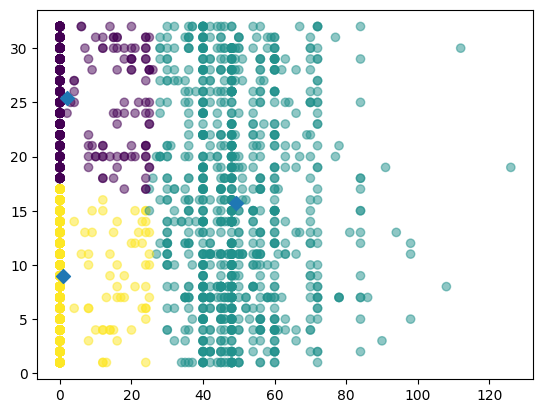

In [175]:
xs = enoe2022_np[:,0]
ys = enoe2022_np[:,1]
plt.scatter(xs, ys, c=labels, alpha=.5)

centroids = model.cluster_centers_
centroids_xs = centroids[:, 0]
centroids_ys = centroids[:, 1]
plt.scatter(centroids_xs, centroids_ys, marker='D',s=50)

### 2- Standardizing and KMeans with a Pipeline

#### 2.a) Pipeline with StandardScaler and KMeans

In [176]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3)
pipeline = make_pipeline(scaler, kmeans)

pipeline.fit(enoe2022_np)
labels = pipeline.predict(enoe2022_np)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### 2.b) Plotting

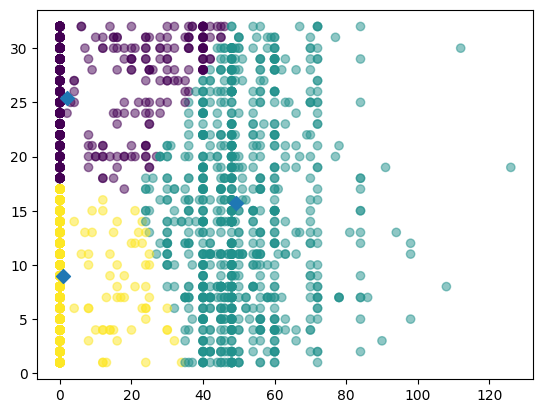

In [177]:
xs = enoe2022_np[:,0]
ys = enoe2022_np[:,1]
plt.scatter(xs, ys, c=labels, alpha=.5)

centroids = model.cluster_centers_
centroids_xs = centroids[:, 0]
centroids_ys = centroids[:, 1]
plt.scatter(centroids_xs, centroids_ys, marker='D',s=50)

## Conclusions
Aspects to be considered.


*   'ent': is the number of the state in the Mexican Republic, being 32 in total.
*   'hrsocup': is the total number of hours worked during the whole week.

### Summary
There is a division of three groups by state and hours worked.
* Group A: employees that works more than 30 hours on average within all states.
* Group B: employees that work less than 30 hours on average in a range of states (1-17)
* Group C: employees that work less than 30 hours on average in a range of states (8-32).

Whith these findings we can see that people who works more than 30 hours can be studied as a whole group. But once we analyze people who work less than 30 hours, there are differences among two groups of states. The place of each state is alphabetical, thus no further conclusion can be made.

If instead of using 3 clusters 2 are being used, then the scatterplot would show a plot with a division in 30 hrs. Which tell us that the working population in mexico can be divided in people who works less that 30 hours or workers who have more than 30 hours of duties.

Somwthing that can be seen too in both scatterplots is that in Mexico there are a lot of peopl who work more than 40 hours. This is not common among developed countries.

#### PD. Even though final clusters have observations that are not very close to each other and features used were just a few, this analysis aims to show skills to use Machine Learning algorithms as KMeans with public datasets.

